In [1]:
cd '/h/kuyeda'

/net/snowflake.geos.tamu.edu/stor/homes/kuyeda


In [10]:
ls -a

./                        d2_cont__0001_003.nc             prog__0013_003.nc*
../                       d2_MOM.res.nc                    prog__0014_003.nc*
adv_test*                 d2_MOM.res_Y0001_D111_S00000.nc  prog__0020_002.nc*
ave_prog__0001_003.nc*    d2_MOM.res_Y0001_D221_S00000.nc  prog__0095_348.nc*
.bash_history*            d2_MOM.res_Y0001_D331_S00000.nc  prog__0096_348.nc*
.bash_logout*             d2_prog__0001_006.nc             test__0001_006.nc*
.bash_profile*            drifters.res.nc                  test__0001_011.nc*
.bashrc*                  drifters_res.nc                  test__0001_016.nc*
.cache/                   forcing__0001_003.nc*            test__0001_031.nc*
d1_ave_prog__0001_003.nc  prog__0001_006.nc*               test__0002_026.nc*
d1_cont__0001_003.nc      prog__0002_006.nc*               test__0003_021.nc*
d1_prog__0001_006.nc      prog__0003_006.nc*               .zprofile:#export
d2_ave_prog__0001_003.nc  prog__0010_004.nc*               .zshrc

* --> executable file (it's compressed)

## But i don't know why recompiling the model resulted in a change in how the files were output

In [3]:
# to scp:
# scp $SCRATCH/9-22_dg_exp/oo_dg_copy/test__0001_031.nc kuyeda@vortex.geos.tamu.edu:/h/kuyeda
#  scp $SCRATCH/9-22_dg_exp/oo_dg_copy/transition_matrix/double_gyre/d1_prog__0001_006.nc kuyeda@vortex.geos.tamu.edu:/h/kuyeda

In [4]:
import xarray as xr
from xgcm import Grid
import numpy as np
import warnings
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import cmocean.cm as cmo
import cmocean
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)

In [5]:
static=xr.open_dataset('/vortex1/OM4_output/new_run/19590101.ocean_static.nc')
basin=xr.open_dataset('/vortex1/OM4_output/new_run/basin_codes.nc',decode_times=False)

# Baseline

In [11]:
restart= xr.open_dataset('/h/kuyeda/d2_MOM.res.nc')
restart

<xarray.Dataset>
Dimensions:          (lath: 20, lonh: 22, latq: 21, lonq: 23, Layer: 2, Time: 1)
Coordinates:
  * lath             (lath) float64 30.5 31.5 32.5 33.5 ... 46.5 47.5 48.5 49.5
  * lonh             (lonh) float64 0.5 1.5 2.5 3.5 4.5 ... 18.5 19.5 20.5 21.5
  * latq             (latq) float64 30.0 31.0 32.0 33.0 ... 47.0 48.0 49.0 50.0
  * lonq             (lonq) float64 0.0 1.0 2.0 3.0 4.0 ... 19.0 20.0 21.0 22.0
  * Layer            (Layer) float64 500.0 1.5e+03
  * Time             (Time) timedelta64[ns] 30 days
Data variables: (12/17)
    Temp             (Time, Layer, lath, lonh) float64 ...
    Salt             (Time, Layer, lath, lonh) float64 ...
    h                (Time, Layer, lath, lonh) float64 ...
    u                (Time, Layer, lath, lonq) float64 ...
    v                (Time, Layer, latq, lonh) float64 ...
    ave_ssh          (Time, lath, lonh) float64 ...
    ...               ...
    CAv              (Time, Layer, latq, lonh) float64 ...
    diffu            (Time, Layer, lath, lonq) float64 ...
    diffv            (Time, Layer, latq, lonh) float64 ...
    ubtav            (Time, lath, lonq) float64 ...
    vbtav            (Time, latq, lonh) float64 ...
    DTBT             (Time) timedelta64[ns] ...
Attributes:
    filename:  RESTART/MOM.res.nc

In [6]:
ds=xr.open_dataset('/h/kuyeda/d2_ave_prog__0001_003.nc')
ds

/home/jupyter-kuyeda/.conda/envs/tropical_project/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


<xarray.Dataset>
Dimensions:     (xq: 23, yh: 20, zl: 2, Time: 6, nv: 2, xh: 22, yq: 21, zi: 3)
Coordinates:
  * xq          (xq) float64 0.0 1.0 2.0 3.0 4.0 ... 18.0 19.0 20.0 21.0 22.0
  * yh          (yh) float64 30.5 31.5 32.5 33.5 34.5 ... 46.5 47.5 48.5 49.5
  * zl          (zl) float64 500.0 1.5e+03
  * Time        (Time) object 0001-01-03 12:00:00 ... 0001-01-28 12:00:00
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 0.5 1.5 2.5 3.5 4.5 ... 17.5 18.5 19.5 20.5 21.5
  * yq          (yq) float64 30.0 31.0 32.0 33.0 34.0 ... 47.0 48.0 49.0 50.0
  * zi          (zi) float64 0.0 1e+03 2e+03
Data variables:
    u           (Time, zl, yh, xq) float32 ...
    v           (Time, zl, yq, xh) float32 ...
    h           (Time, zl, yh, xh) float64 ...
    e           (Time, zi, yh, xh) float32 ...
    average_T1  (Time) object ...
    average_T2  (Time) object ...
    average_DT  (Time) timedelta64[ns] ...
    Time_bnds   (Time, nv) timedelta64[ns] ...
Attributes:
    filename:   d2_ave_prog__0001_003.nc
    title:      MOM Experiment
    grid_type:  regular
    grid_tile:  N/A

In [18]:
grid= Grid(ds, coords={'X':{'center':'xh','outer':'xq'},'Y':{'center':'yh','outer':'yq'}, 'Z':{'center':'zl','outer':'zi'}},periodic=['X'])

In [19]:
newcmap = cmocean.cm.tools.crop_by_percent(cmo.thermal, 40, which='min', N=None)

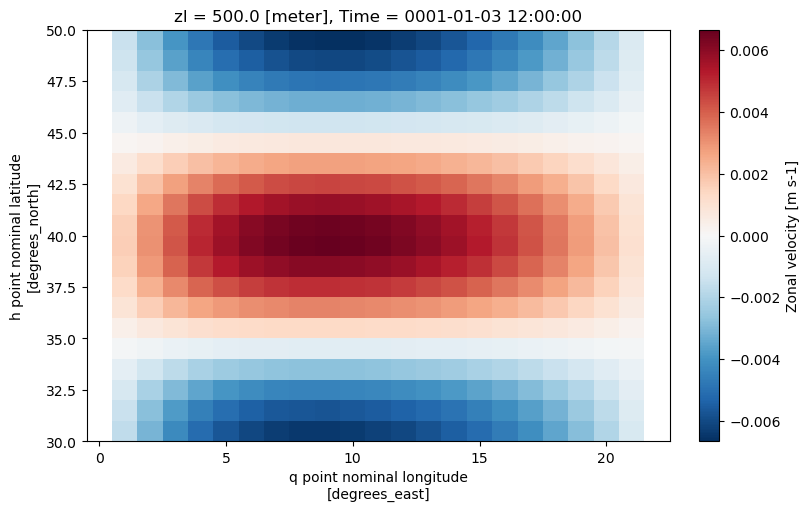

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=1,constrained_layout=True)
ds.u.isel(Time=0,zl=0).plot()
#ds.taux.isel(Time=0).plot(ax=ax[1])

In [21]:
u_interp=grid.interp(ds.u,axis=['X','Y'])

In [22]:
mag=np.sqrt(((u_interp.isel(Time=-1))**2)+((ds.v.isel(Time=-1))**2))
u_plot=((u_interp.isel(Time=-1))/mag)
v_plot=((ds.v.isel(Time=-1))/mag)

p=3

u_plot=u_plot.coarsen(xh=p,boundary='trim').mean().coarsen(yq=p,boundary='trim').mean()
v_plot=v_plot.coarsen(xh=p,boundary='trim').mean().coarsen(yq=p,boundary='trim').mean()

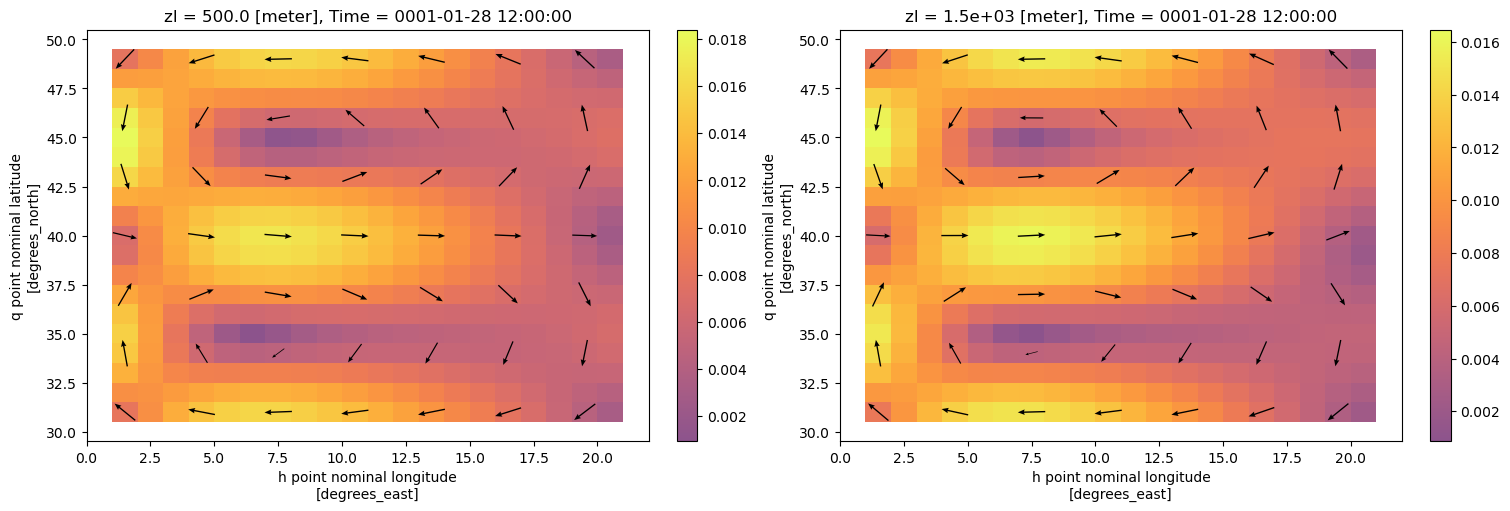

In [23]:
# there's padding around the boundaries, which is making interpolation difficult with basin data
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(15,5))
mag.isel(zl=0).plot(ax=ax[0],cmap=newcmap)
mag.isel(zl=1).plot(ax=ax[1],cmap=newcmap)

scalef=15

x=v_plot.xh
y=v_plot.yq

U1=u_plot.isel(zl=0)
V1=v_plot.isel(zl=0)
ax[0].quiver(x,y,U1,V1,color='Black',scale=scalef,scale_units='height'
                       ,minshaft=4,headwidth=4,headlength=5,pivot='middle')

U2=u_plot.isel(zl=1)
V2=v_plot.isel(zl=1)
ax[1].quiver(x,y,U2,V2,color='Black',scale=scalef,scale_units='height'
                       ,minshaft=4,headwidth=4,headlength=5,pivot='middle')

# Tracers?

from transition_matrix github